In [27]:
%load_ext autoreload
%autoreload 2

In [1]:
import glob
import os
import pickle
import random
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import scipy
import seaborn as sns

import extq
import prettypyplot as pplt

In [2]:
! source /project/dinner/scguo/upside2/sourceme.sh

In [3]:
upside_path = "/project/dinner/scguo/upside2/"
upside_utils_dir = os.path.expanduser(upside_path + "/py")
sys.path.insert(0, upside_utils_dir)

In [4]:
plt.style.use("custom")  # custom style sheet
plt.style.use("vibrant")  # muted color theme from SciencePlots
pplt.load_cmaps()

In [5]:
plt.rcParams[
    "text.latex.preamble"
] = r"\usepackage{siunitx}\sisetup{detect-all}\usepackage{helvet}\usepackage{sansmath}\sansmath"
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = "cm"

# Load data

In [6]:
n_rep = 48  # replica number

heads = [
    "2qke_mon",
    "fs_wtseq",
]
output_dirs = ["gs", "fs"]
work_dir = "/project/dinner/scguo/kaiB/remd/wt_iso/"

In [7]:
def load_cvs():
    fs_qtots, q_gs_all, q_gs, q_fs_all, q_fs, q_core = [], [], [], [], [], []

    for d, head in zip(output_dirs, heads):
        fs_qtots.extend(np.load(f"{work_dir}/outputs/{head}_{d}_fs_qtots.pkl", allow_pickle=True))
        q_gs_all.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_gs_all.pkl", allow_pickle=True))
        q_gs.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_gs.pkl", allow_pickle=True))
        q_fs_all.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_fs_all.pkl", allow_pickle=True))
        q_fs.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_fs.pkl", allow_pickle=True))
        q_core.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_core.pkl", allow_pickle=True))

    fs_qtots = np.asarray([traj[:, start_frame:end_frame:skip] for traj in fs_qtots])
    q_gs_all = np.asarray([traj[start_frame:end_frame:skip] for traj in q_gs_all])
    q_fs_all = np.asarray([traj[start_frame:end_frame:skip] for traj in q_fs_all])
    q_gs = np.asarray([traj[start_frame:end_frame:skip] for traj in q_gs])
    q_fs = np.asarray([traj[start_frame:end_frame:skip] for traj in q_fs])
    q_core = np.asarray([traj[start_frame:end_frame:skip] for traj in q_core])

    return fs_qtots, q_gs_all, q_gs, q_fs_all, q_fs, q_core

In [8]:
q_gs_all = []
for d, head in zip(output_dirs, heads):
    q_gs_all.extend(np.load(f"{work_dir}/outputs/{head}_{d}_q_gs_all.pkl", allow_pickle=True))

In [9]:
print([len(traj) for traj in q_gs_all])

[36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 36943, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111, 34111]


In [10]:
start_frame = 4000  # skip first _ frames
end_frame = 34000
skip = 1  #

fs_qtots, q_gs_all, q_gs, q_fs_all, q_fs, q_core = load_cvs()

In [11]:
fs_qtots.shape

(96, 8, 30000)

In [12]:
c_green = fs_qtots[:, 4] - fs_qtots[:, 5]
c_blue = fs_qtots[:, 6] - fs_qtots[:, 7]
c_orange = fs_qtots[:, 2] - fs_qtots[:, 3]
c_0 = fs_qtots[:, 0] - fs_qtots[:, 1]

In [13]:
cvs = dict(
    blue=c_blue,
    green=c_green,
    orange=c_orange,
    c0=c_0,
    q_gs_all=q_gs_all,
    q_fs_all=q_fs_all,
    q_core=q_core,
    q_gs=q_gs,
    q_fs=q_fs,
    q_diff=q_fs - q_gs,
)
labels = dict(
    blue=r"$\beta4_{\mathrm{gs}}\longleftrightarrow\alpha3_{\mathrm{fs}}$",
    green=r"$\alpha3_{\mathrm{gs}}\longleftrightarrow\beta4_{\mathrm{fs}}$",
    orange=r"$\alpha2_{\mathrm{gs}}\longleftrightarrow\beta3_{\mathrm{fs}}$",
    c0=r"$\beta3_{\mathrm{gs}}\longleftrightarrow\alpha2_{\mathrm{fs}}$",
    q_gs_all=r"$Q_{\mathrm{gs}}$",
    q_fs_all=r"$Q_{\mathrm{fs}}$",
    q_gs=r"$Q_{\mathrm{gs, C}}$",
    q_fs=r"$Q_{\mathrm{fs, C}}$",
    q_core=r"$Q_{\mathrm{N}}$",
    q_diff=r"$Q_{\mathrm{fs, C}}-Q_{\mathrm{gs, C}}$",
)
lims = dict(
    blue=(-1.3, 1),
    green=(-1, 1.3),
    orange=(-1, 1.3),
    c0=(-1.3, 1),
    q_gs_all=(0, 1),
    q_fs_all=(0, 1),
    q_gs=(0, 1),
    q_fs=(0, 1),
    q_core=(0, 1),
    q_diff=(-1, 1),
)

# MBAR reweighting

In [14]:
import pymbar

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [16]:
# load temperatures and energies
pot, hb, Ts, T, rgs = [], [], [], [], []

for i in range(n_rep):
    pot_arrays, hb_arrays, rg_arrays = [], [], []
    for d, n in zip(output_dirs, heads):
        pot_arrays.append(
            np.load(f"{work_dir}/{d}/outputs/{n}.run.{i:02}_Energy.npy")[start_frame:end_frame:skip, 0]
        )
        hb_arrays.append(
            np.load(f"{work_dir}/{d}/outputs/{n}.run.{i:02}_Hbond.npy")[start_frame:end_frame:skip]
        )
        rg_arrays.append(
            np.load(f"{work_dir}/{d}/outputs/{n}.run.{i:02}_Rg.npy")[start_frame:end_frame:skip]
        )

    pot.append(np.concatenate(pot_arrays))
    hb.append(np.concatenate(hb_arrays))
    rgs.append(np.concatenate(rg_arrays))
    t = np.load(f"{work_dir}/{output_dirs[0]}/outputs/{heads[0]}.run.{i:02}_T.npy")
    nsize = pot[0].size
    Ts.append(np.zeros(nsize) + t)
    T.append(t)

pot = np.array(pot)
hb = np.array(hb)
rgs = np.array(rgs)
Ts = np.array(Ts)
T = np.array(T)

print(pot.shape, hb.shape, rgs.shape, Ts.shape, T.shape)

(48, 60000) (48, 60000) (48, 60000) (48, 60000) (48,)


In [17]:
print([arr.shape for arr in pot_arrays])

[(30000,), (30000,)]


In [18]:
kB = 1.0  # upside unit
beta = 1 / (kB * T)

nsamples = pot.shape[-1]
nsamples_arr = np.zeros([n_rep], np.int32) + len(pot[0])
reduced_pot = np.zeros([n_rep, n_rep, nsamples], np.float32)
for k in range(n_rep):
    for l in range(n_rep):
        reduced_pot[k, l] = beta[l] * pot[k]

In [19]:
reduced_pot.shape

(48, 48, 60000)

In [20]:
mbar = pymbar.MBAR(reduced_pot, nsamples_arr, verbose=True)


******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## melting curve

In [21]:
rg_reweight = mbar.compute_expectations(rgs)
hb_reweight = mbar.compute_expectations(hb)

/beagle3/dinner/scguo/envs/md/lib/python3.11/site-packages/pymbar/mbar.py:935: RuntimeWarning: divide by zero encountered in log
  Log_W_nk[:, sa] = np.log(A_n[i, ri]) + Log_W_nk[:, l]


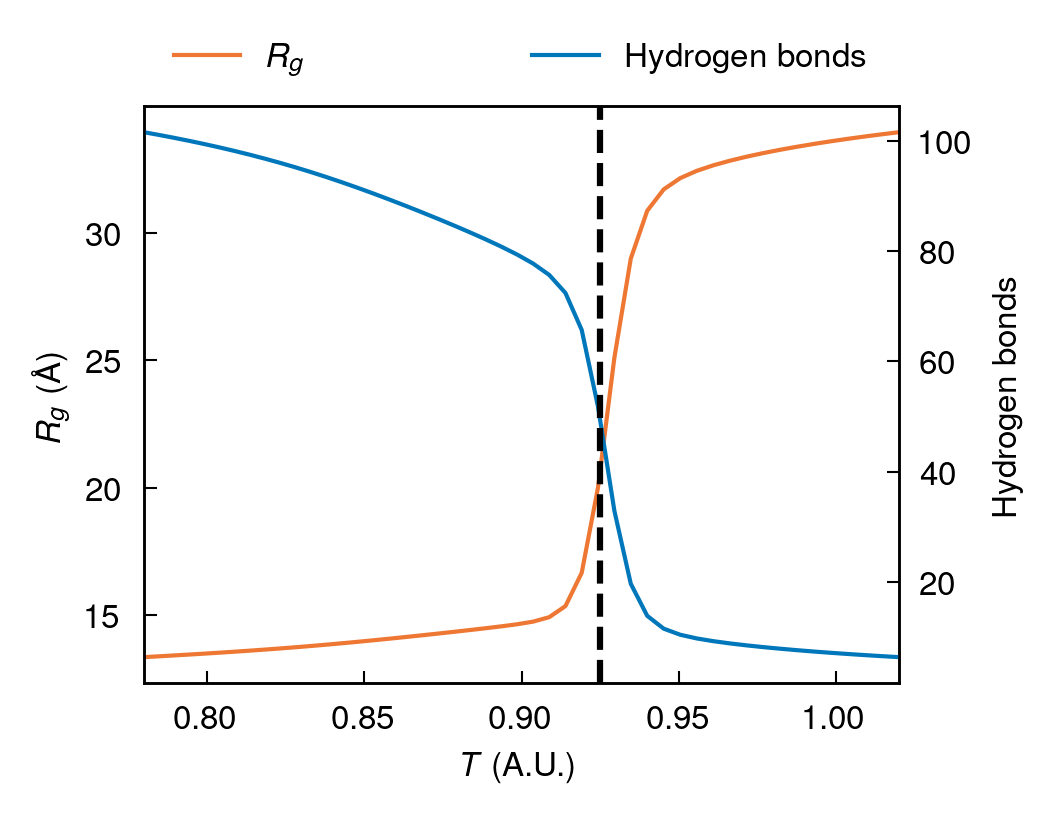

In [22]:
fig = plt.figure(figsize=(3.25, 2.5), dpi=300)
ax = plt.gca()
(line1,) = ax.plot(T, rg_reweight["mu"], color="C0", label="$R_g$", lw=1.0)
ax.set_ylabel("$R_g$ (Å)")
ax2 = plt.twinx()
(line2,) = ax2.plot(T, hb_reweight["mu"], color="C1", label="Hydrogen bonds", lw=1.0)
ax2.set_ylabel("Hydrogen bonds")
ax.set_xlabel("$T$ (A.U.)")
ax2.axvline(0.925, ls="--", color="k", lw=1.5, zorder=5)
ax.set_xlim([T[0], T[-1]])

pplt.legend(outside="top", ncol=2, handles=[line1, line2])

# plot PMFs

In [23]:
def reweight(T_test):
    beta_test = 1 / (kB * T_test)
    log_w_nb = mbar._computeUnnormalizedLogWeights(
        np.ravel(beta_test * pot)
    )  # compute free energy at T_test
    max_log_w_nb = np.max(log_w_nb)  # to prevent underflow.
    w_nb = np.exp(log_w_nb - max_log_w_nb)
    return w_nb

In [24]:
weights_87 = reweight(0.87)
print(weights_87.shape)

(2880000,)


In [30]:
import extq

In [32]:
import importlib

In [33]:
importlib.reload(extq)

<module 'extq' from '/project/dinner/scguo/extq/src/extq/__init__.py'>

/scratch/local/jobs/23552931/ipykernel_1039808/1614810309.py:34: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(hist) - np.min(-np.log(hist))


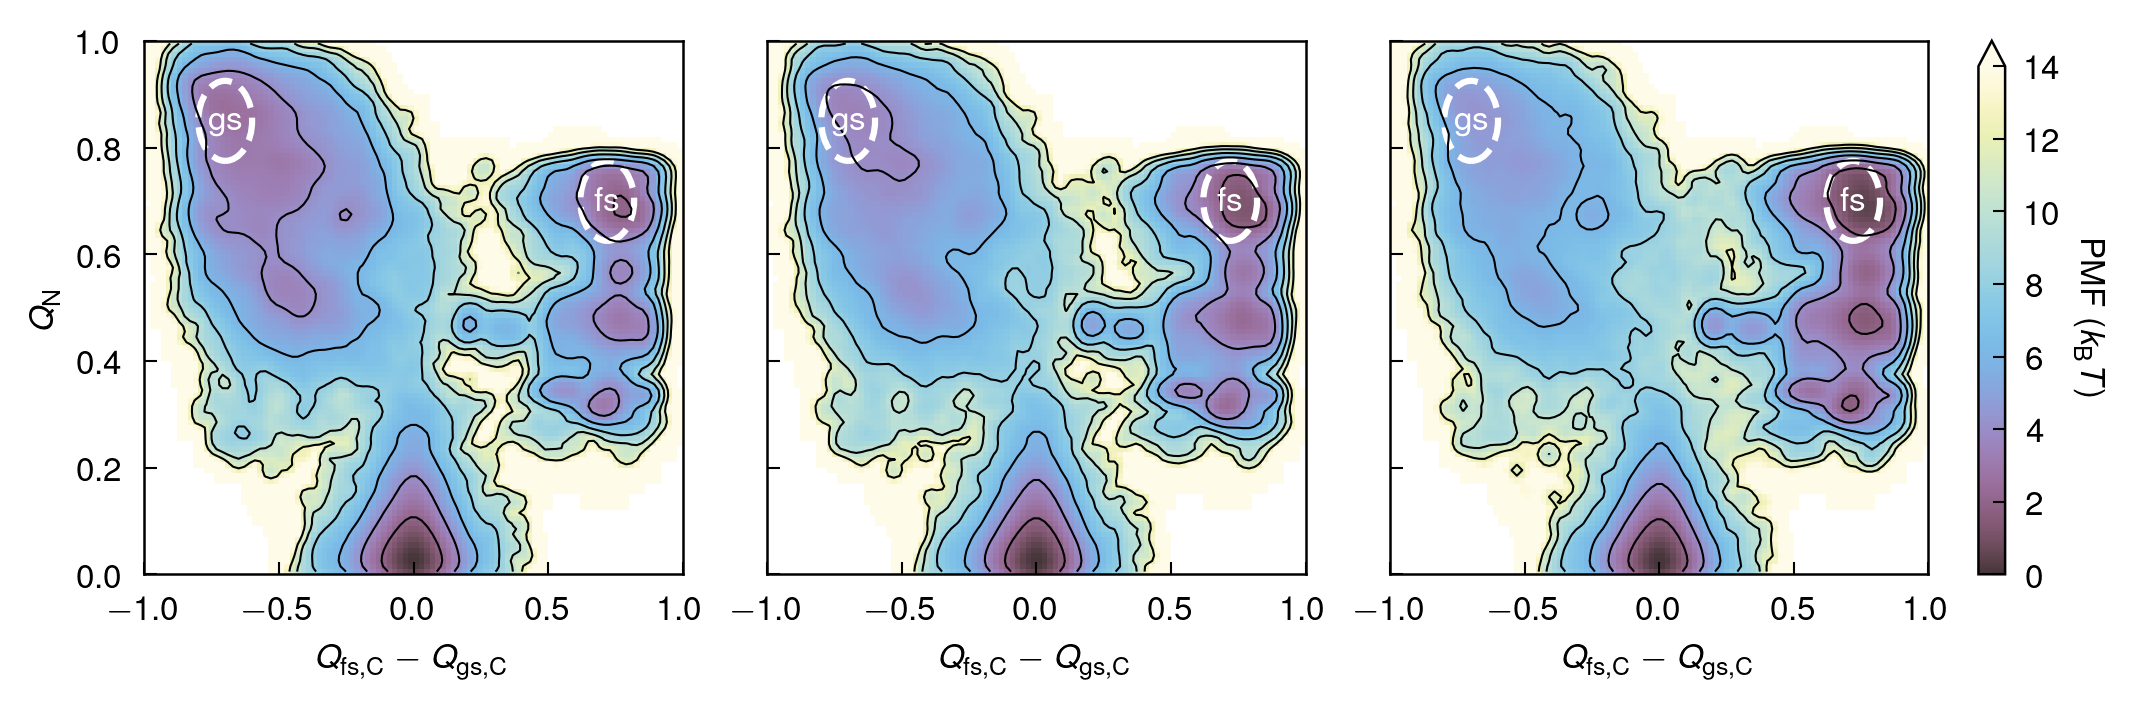

In [42]:
clines = np.arange(0, 14, 2)
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(7, 2.25), dpi=300, sharex=True, sharey=True, constrained_layout=True
)
cv1 = "q_diff"
cv2 = "q_core"
xe = np.linspace(*lims[cv1], 101)
ye = np.linspace(*lims[cv2], 101)
xc = (xe[:-1] + xe[1:]) / 2
yc = (ye[:-1] + ye[1:]) / 2
for ax, temp in zip(axes, [0.87, 0.89, 0.91]):
    cv1_delay = cvs[cv1]
    cv2_delay = cvs[cv2]
    weights = reweight(temp).reshape((96, -1))
    # hist = extq.projection.density2d(
    #     cv1_delay,
    #     cv2_delay,
    #     weights,
    #     xe,
    #     ye,
    # )
    # hist = scipy.ndimage.gaussian_filter(hist, sigma=0.5, mode="constant")
    hist, _, _ = extq.kde.kdesum2d(
        cv1_delay,
        cv2_delay,
        weights,
        xmin=lims[cv1][0],
        xmax=lims[cv1][1],
        ymin=lims[cv2][0],
        ymax=lims[cv2][1],
        nx=100,
        ny=100,
    )
    pmf = -np.log(hist) - np.min(-np.log(hist))
    pc = ax.pcolormesh(xc, yc, pmf.T, cmap="iridescent_r", vmin=0, vmax=14, rasterized=True)
    ax.contour(xc, yc, pmf.T, colors="black", levels=clines, linewidths=0.5)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb = plt.colorbar(pc, ax=axes[-1], extend="max")
cb.set_label(label=r"PMF ($k_{\mathrm{B}}T$)", rotation=-90, labelpad=10)

for ax in axes:
    ellipseA = mpl.patches.Ellipse(xy=(-0.7, 0.85), width=0.2, height=0.15)
    ellipseB = mpl.patches.Ellipse(xy=(0.72, 0.7), width=0.2, height=0.15)
    for e in (ellipseA, ellipseB):
        e.set_fill(False)
        e.set_linestyle("--")
        e.set_linewidth(1.5)
        e.set_edgecolor("white")
    ax.add_artist(ellipseA)
    ax.add_artist(ellipseB)
    pplt.text(-0.7, 0.85, "gs", ax=ax, color="white")
    pplt.text(0.72, 0.7, "fs", ax=ax, color="white")

plt.savefig("./pmf_qcore_qdiff_wt.pdf", bbox_inches='tight')

/scratch/local/jobs/23552931/ipykernel_1039808/718785903.py:25: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(hist) - np.min(-np.log(hist))


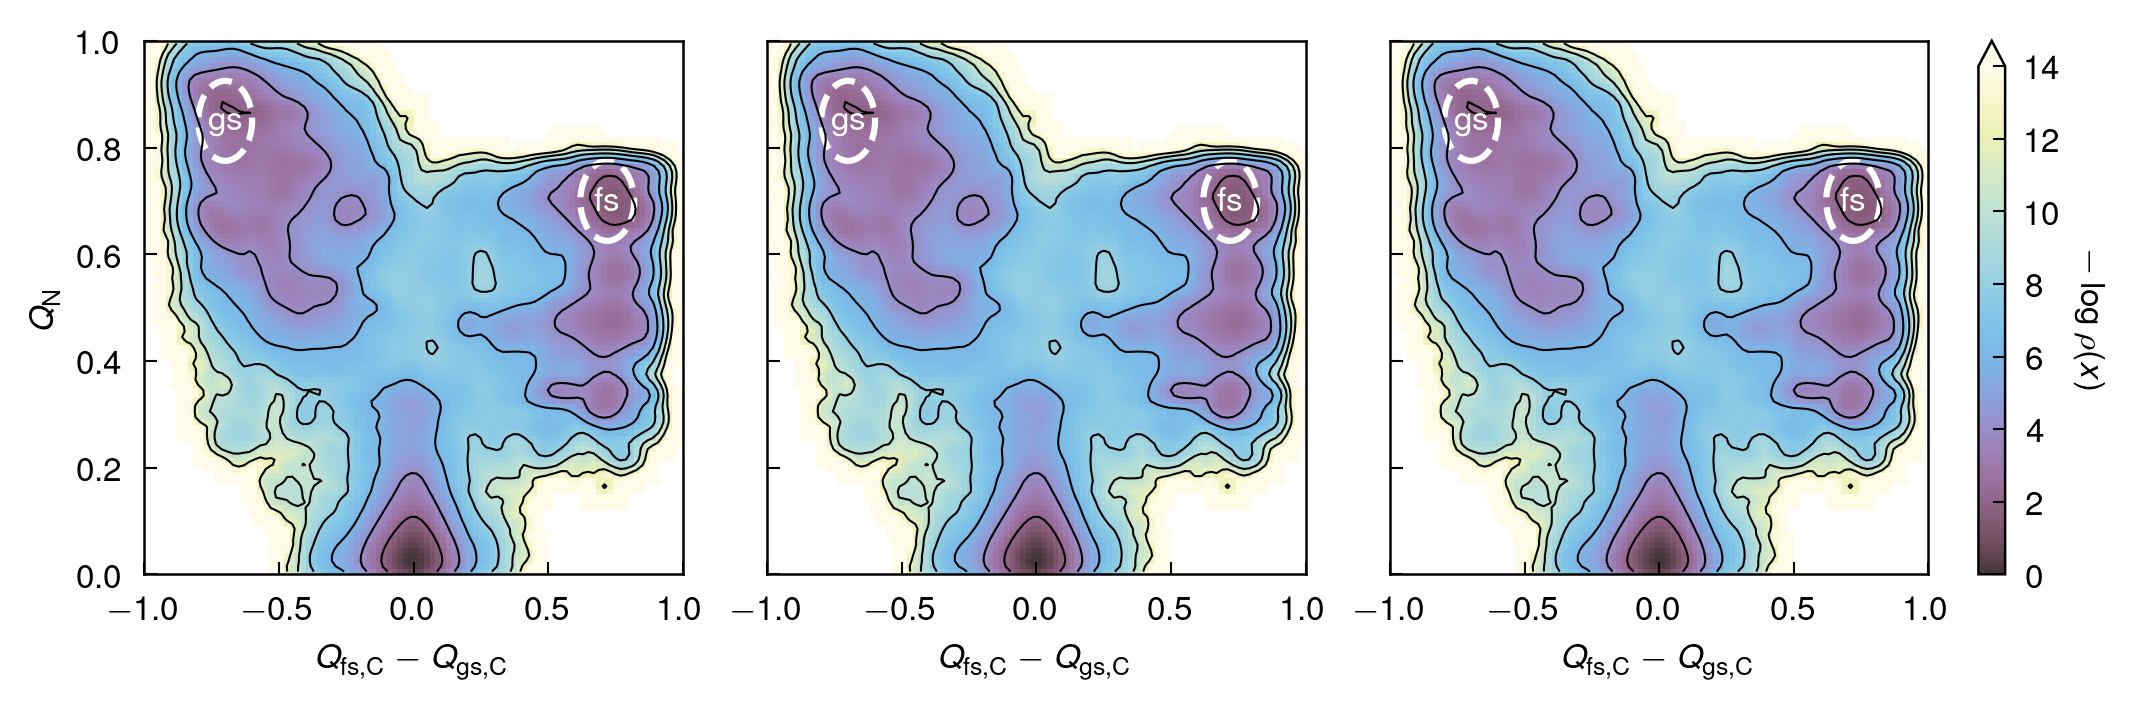

In [41]:
clines = np.arange(0, 14, 2)
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(7, 2.25), dpi=300, sharex=True, sharey=True, constrained_layout=True
)
cv1 = "q_diff"
cv2 = "q_core"
xe = np.linspace(*lims[cv1], 101)
ye = np.linspace(*lims[cv2], 101)
xc = (xe[:-1] + xe[1:]) / 2
yc = (ye[:-1] + ye[1:]) / 2
for ax, temp in zip(axes, [0.87, 0.89, 0.91]):
    cv1_delay = cvs[cv1]
    cv2_delay = cvs[cv2]
    hist, _, _ = extq.kde.kdesum2d(
        cv1_delay,
        cv2_delay,
        np.ones_like(cv1_delay),
        xmin=lims[cv1][0],
        xmax=lims[cv1][1],
        ymin=lims[cv2][0],
        ymax=lims[cv2][1],
        nx=100,
        ny=100,
    )
    pmf = -np.log(hist) - np.min(-np.log(hist))
    pc = ax.pcolormesh(xc, yc, pmf.T, cmap="iridescent_r", vmin=0, vmax=14, rasterized=True)
    ax.contour(xc, yc, pmf.T, colors="black", levels=clines, linewidths=0.5)
    ax.set_xlabel(labels[cv1])
    ax.set_ylabel(labels[cv2])
    ax.label_outer()
cb = plt.colorbar(pc, ax=axes[-1], extend="max")
cb.set_label(label=r"$-\log \rho(x)$", rotation=-90, labelpad=10)

for ax in axes:
    ellipseA = mpl.patches.Ellipse(xy=(-0.7, 0.85), width=0.2, height=0.15)
    ellipseB = mpl.patches.Ellipse(xy=(0.72, 0.7), width=0.2, height=0.15)
    for e in (ellipseA, ellipseB):
        e.set_fill(False)
        e.set_linestyle("--")
        e.set_linewidth(1.5)
        e.set_edgecolor("white")
    ax.add_artist(ellipseA)
    ax.add_artist(ellipseB)
    pplt.text(-0.7, 0.85, "gs", ax=ax, color="white")
    pplt.text(0.72, 0.7, "fs", ax=ax, color="white")

/scratch/local/jobs/23552931/ipykernel_1039808/3830840987.py:23: RuntimeWarning: divide by zero encountered in log
  pmf = -np.log(hist) - np.min(-np.log(hist))


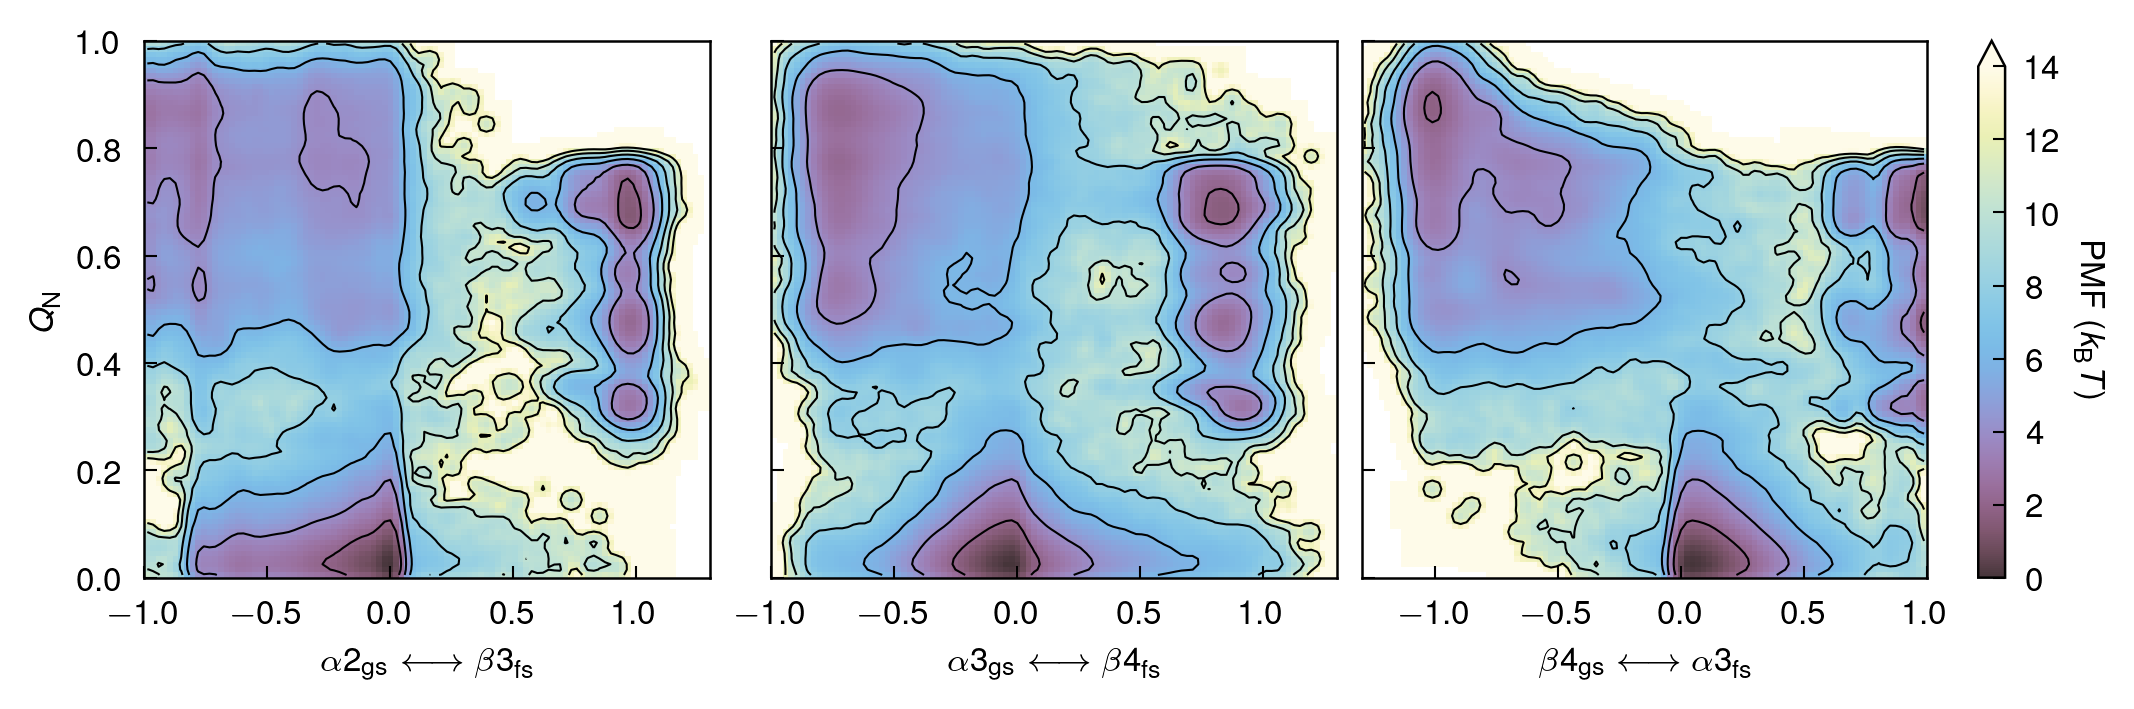

In [40]:
# plot PMFs of different cvs
clines = np.arange(0, 14, 2)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.25), dpi=300, sharey=True, constrained_layout=True)

ye = np.linspace(*lims["q_core"], 101)
yc = (ye[1:] + ye[:-1]) / 2

weights = reweight(0.87).reshape((96, -1))
for ax, cv in zip(axes, ["orange", "green", "blue"]):
    xe = np.linspace(*lims[cv], 101)
    xc = (xe[1:] + xe[:-1]) / 2
    hist, _, _ = extq.kde.kdesum2d(
        cvs[cv],
        cvs['q_core'],
        weights,
        xmin=lims[cv][0],
        xmax=lims[cv][1],
        ymin=lims['q_core'][0],
        ymax=lims['q_core'][1],
        nx=100,
        ny=100,
    )
    pmf = -np.log(hist) - np.min(-np.log(hist))
    pc = ax.pcolormesh(xc, yc, pmf.T, cmap="iridescent_r", vmin=0, vmax=14, rasterized=True)
    ax.contour(xc, yc, pmf.T, colors="black", levels=clines, linewidths=0.5)
    ax.set_xlabel(labels[cv])
    ax.set_ylabel(labels["q_core"])
    ax.label_outer()

cb = plt.colorbar(pc, ax=axes[-1], extend="max")
cb.set_label(label=r"PMF ($k_{\mathrm{B}}T$)", rotation=-90, labelpad=10)